## **Data Science Task 6**

**Name:** Satyam Mahesh Salunkhe  
**Batch:** July 5th, 2024

### Objective:


1.   Implement time series analysis for
     forecasting trends and seasonality.
2.   Perform sentiment analysis or text mining on
     unstructured data.
3.   Explore clustering or classification
     techniques for segmentation and pattern
     recognition.



In [1]:
# importing common libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Main Flow Services Internships/Data Science with Python Programming/IPL_2023_DATASET.csv")
df.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2022 Squad,Team,Base Price IN ₹,Base Price IN $
0,0,Shivam Mavi,4000000,BOWLER,6.0,720.0,KKR,Gujarat Titans,NaN,NaN
1,1,Joshua Little,5000000,BOWLER,4.4,528.0,NaN,Gujarat Titans,NaN,NaN
2,2,Kane Williamson,20000000,BATSMAN,2.0,240.0,SRH,Gujarat Titans,NaN,NaN
3,3,K.S. Bharat,2000000,WICKETKEEPER,1.2,144.0,DC,Gujarat Titans,NaN,NaN
4,4,Mohit Sharma,5000000,BOWLER,0.5,60.0,NaN,Gujarat Titans,NaN,NaN


In [3]:
df.tail()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2022 Squad,Team,Base Price IN ₹,Base Price IN $
563,563,Dhruv Patel,NaN,ALL-ROUNDER,NaN,NaN,NaN,Unsold,2000000.0,24000.0
564,564,Jack Prestwidge,NaN,ALL-ROUNDER,NaN,NaN,NaN,Unsold,2000000.0,24000.0
565,565,Aditya Sarvate,NaN,ALL-ROUNDER,NaN,NaN,NaN,Unsold,2000000.0,24000.0
566,566,Sagar Solanki,NaN,ALL-ROUNDER,NaN,NaN,NaN,Unsold,2000000.0,24000.0
567,567,Prenelan Subrayen,NaN,ALL-ROUNDER,NaN,NaN,NaN,Unsold,2000000.0,24000.0


In [4]:
df.shape

(568, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       568 non-null    int64  
 1   Player           568 non-null    object 
 2   Base Price       243 non-null    object 
 3   TYPE             568 non-null    object 
 4   COST IN ₹ (CR.)  243 non-null    float64
 5   Cost IN $ (000)  243 non-null    float64
 6   2022 Squad       230 non-null    object 
 7   Team             568 non-null    object 
 8   Base Price IN ₹  325 non-null    float64
 9   Base Price IN $  325 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 44.5+ KB


In [6]:
df = df.drop_duplicates()
df.shape

(568, 10)

In [7]:
# checking for null values
df.isnull().sum()

,0
Unnamed: 0,0
Player,0
Base Price,325
TYPE,0
COST IN ₹ (CR.),325
Cost IN $ (000),325
2022 Squad,338
Team,0
Base Price IN ₹,243
Base Price IN $,243


In [8]:
df1 = df.fillna(value=0)
df1.isnull().sum()

,0
Unnamed: 0,0
Player,0
Base Price,0
TYPE,0
COST IN ₹ (CR.),0
Cost IN $ (000),0
2022 Squad,0
Team,0
Base Price IN ₹,0
Base Price IN $,0


In [9]:
df1 = df.drop(columns=['Unnamed: 0'])

In [10]:
df1

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2022 Squad,Team,Base Price IN ₹,Base Price IN $
0,Shivam Mavi,4000000,BOWLER,6.0,720.0,KKR,Gujarat Titans,NaN,NaN
1,Joshua Little,5000000,BOWLER,4.4,528.0,NaN,Gujarat Titans,NaN,NaN
2,Kane Williamson,20000000,BATSMAN,2.0,240.0,SRH,Gujarat Titans,NaN,NaN
3,K.S. Bharat,2000000,WICKETKEEPER,1.2,144.0,DC,Gujarat Titans,NaN,NaN
4,Mohit Sharma,5000000,BOWLER,0.5,60.0,NaN,Gujarat Titans,NaN,NaN
...,...,...,...,...,...,...,...,...,...
563,Dhruv Patel,NaN,ALL-ROUNDER,NaN,NaN,NaN,Unsold,2000000.0,24000.0
564,Jack Prestwidge,NaN,ALL-ROUNDER,NaN,NaN,NaN,Unsold,2000000.0,24000.0
565,Aditya Sarvate,NaN,ALL-ROUNDER,NaN,NaN,NaN,Unsold,2000000.0,24000.0
566,Sagar Solanki,NaN,ALL-ROUNDER,NaN,NaN,NaN,Unsold,2000000.0,24000.0


In [11]:
df1.columns

Index(['Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)', 'Cost IN $ (000)',
       '2022 Squad', 'Team', 'Base Price IN ₹', 'Base Price IN $'],
      dtype='object')

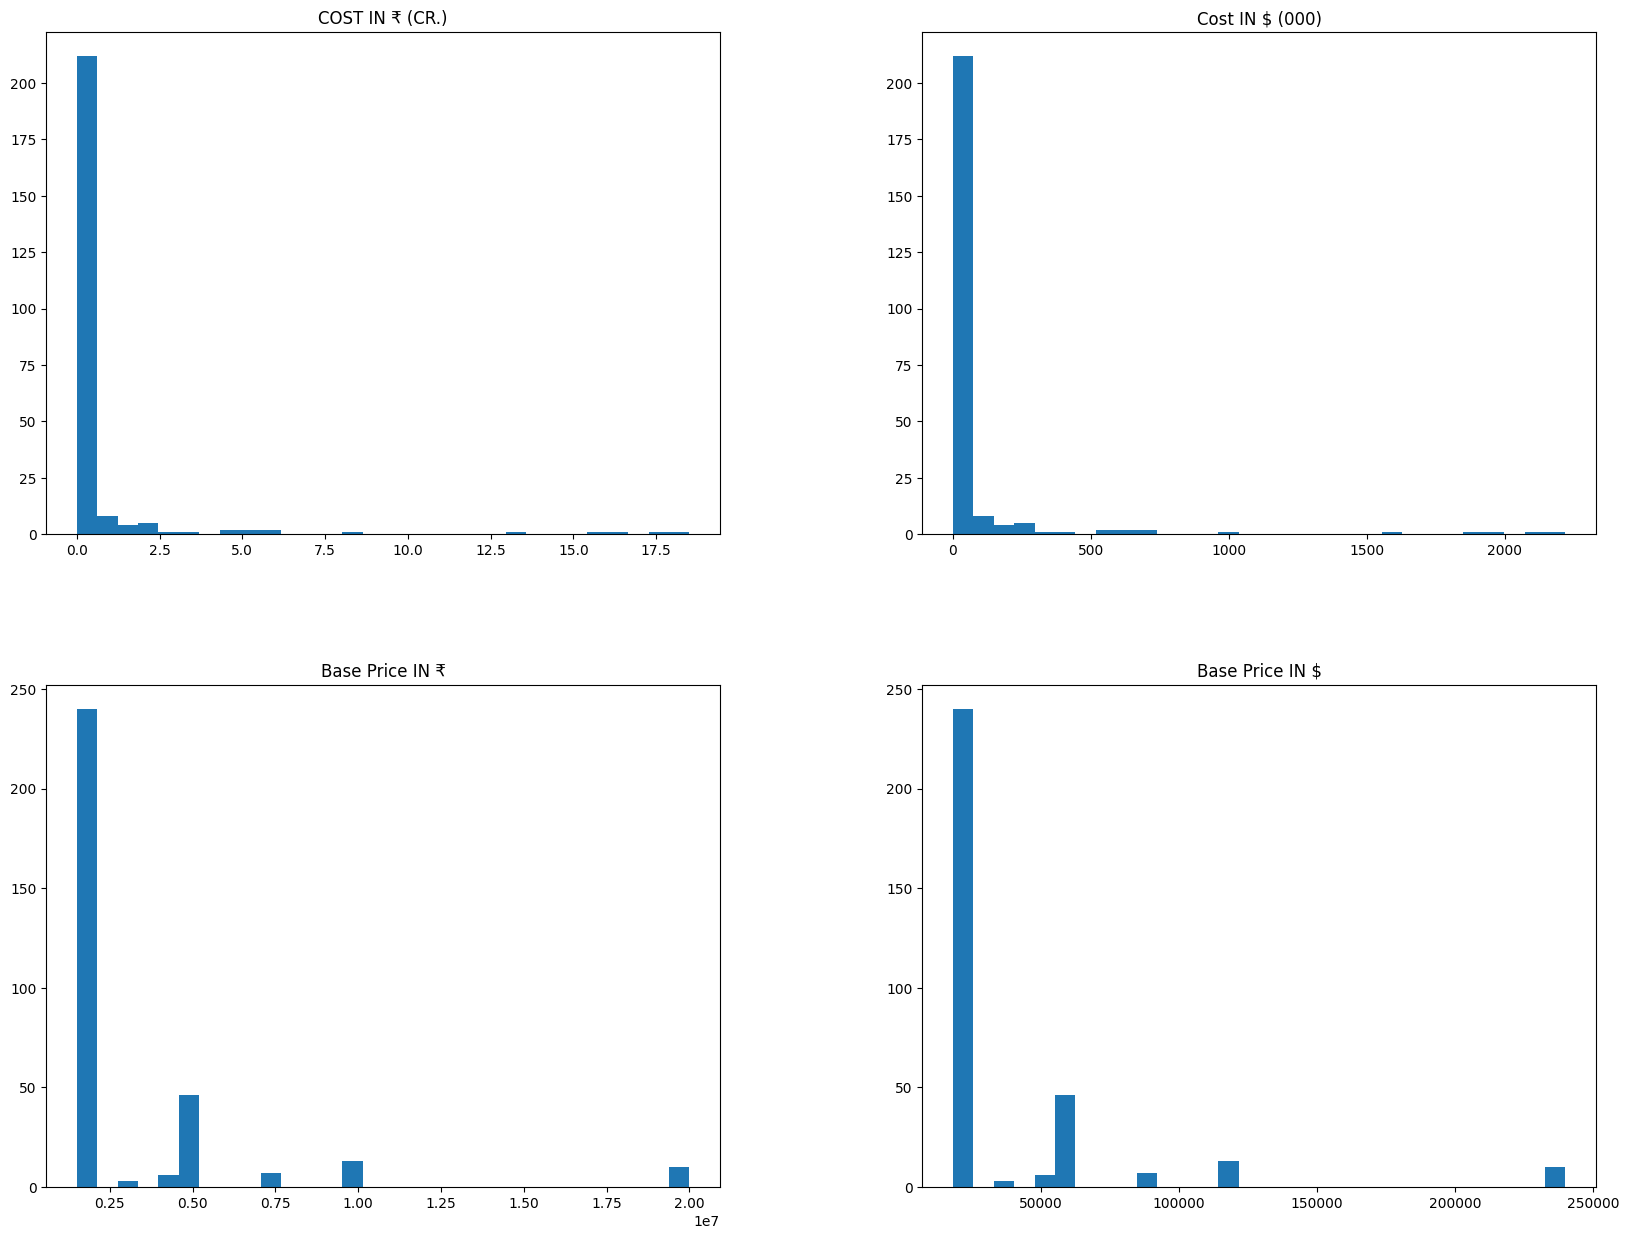

In [12]:
df1.hist(bins = 30, grid = False , figsize=(20,15));

In [13]:
df.TYPE.value_counts()

,count
TYPE,
ALL-ROUNDER,213
BOWLER,189
BATSMAN,91
WICKETKEEPER,75


In [14]:
Questions = ["Q1. What is average base price for a type of player?",
             "Q2. Which type has most base price?",
             "Q3. Which team has more players of higher base price?",
             "Q4. Which team has most all rounders?",
             "Q5. What type of players are most considered in a team?"]
Questions

['Q1. What is average base price for a type of player?',
 'Q2. Which type has most base price?',
 'Q3. Which team has more players of higher base price?',
 'Q4. Which team has most all rounders?',
 'Q5. What type of players are most considered in a team?']

### Q1. What is average base price for a type of player?

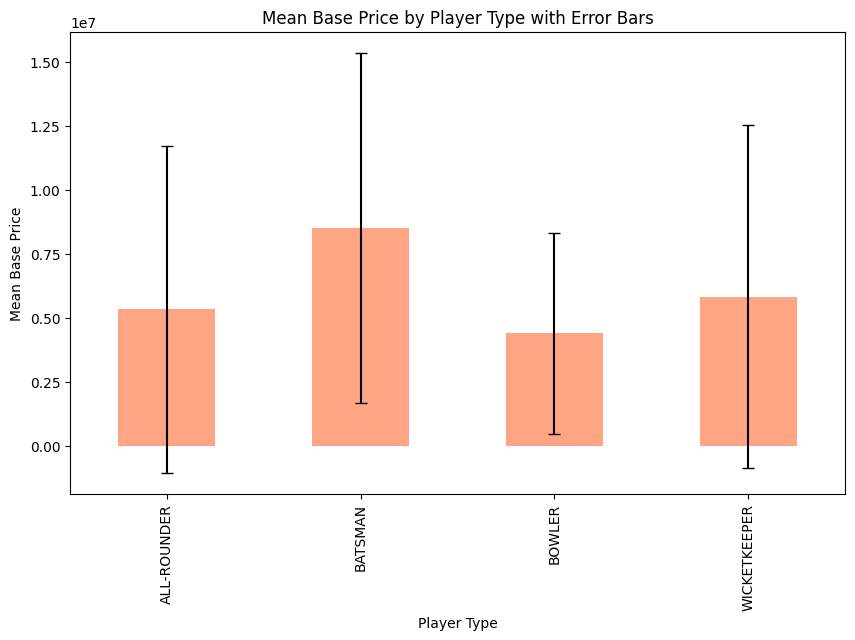

In [15]:
# Convert 'Base Price' to numeric, forcing errors to NaN, then dropping NaNs
df['Base Price'] = pd.to_numeric(df['Base Price'], errors='coerce')

# Drop rows where 'Base Price' is NaN (if any)
df = df.dropna(subset=['Base Price'])

# Calculate mean and standard deviation for each player type
mean_price = df.groupby('TYPE')['Base Price'].mean()
std_price = df.groupby('TYPE')['Base Price'].std()

# Create a bar plot with error bars
plt.figure(figsize=(10, 6))
mean_price.plot(kind='bar', yerr=std_price, capsize=4, color='coral', alpha=0.7)

plt.title('Mean Base Price by Player Type with Error Bars')
plt.xlabel('Player Type')
plt.ylabel('Mean Base Price')
plt.show()

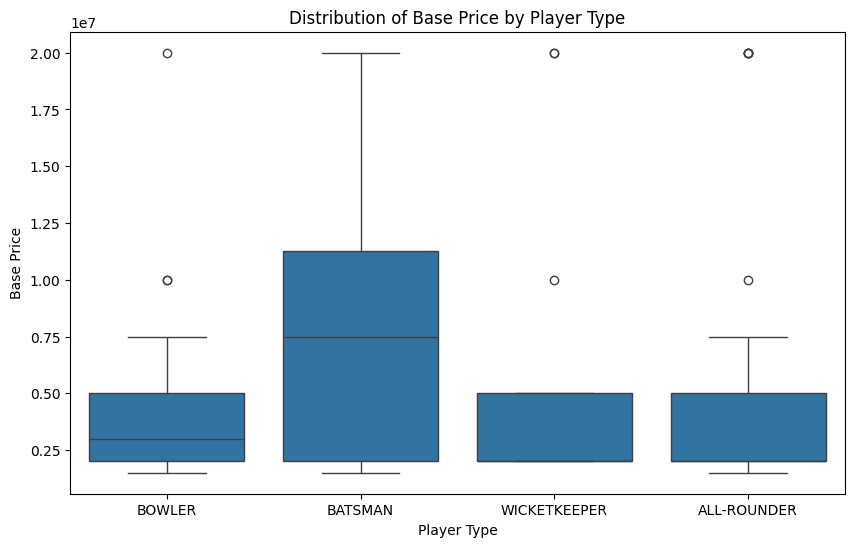

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TYPE', y='Base Price', data=df)
plt.title('Distribution of Base Price by Player Type')
plt.xlabel('Player Type')
plt.ylabel('Base Price')
plt.show()

### Q2. Which type has most base price?

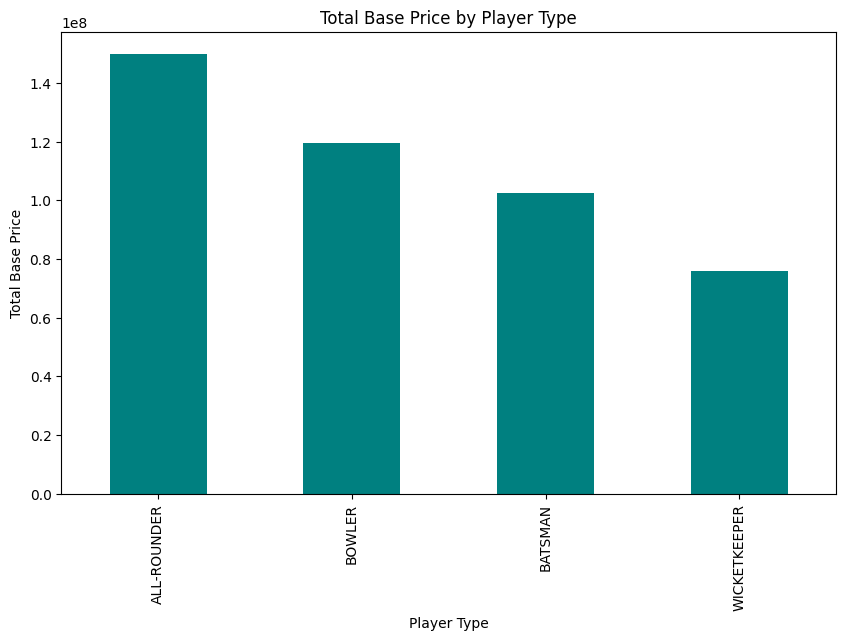

In [17]:
# Now, proceed with the original plotting code
plt.figure(figsize=(10, 6))

# Group by 'TYPE', then calculate the sum of 'Base Price' for each type
df.groupby('TYPE')['Base Price'].sum().sort_values(ascending=False).plot(kind='bar', color='teal')

plt.title('Total Base Price by Player Type')
plt.xlabel('Player Type')
plt.ylabel('Total Base Price')
plt.show()

### Q3. Which team has more players of higher base price?

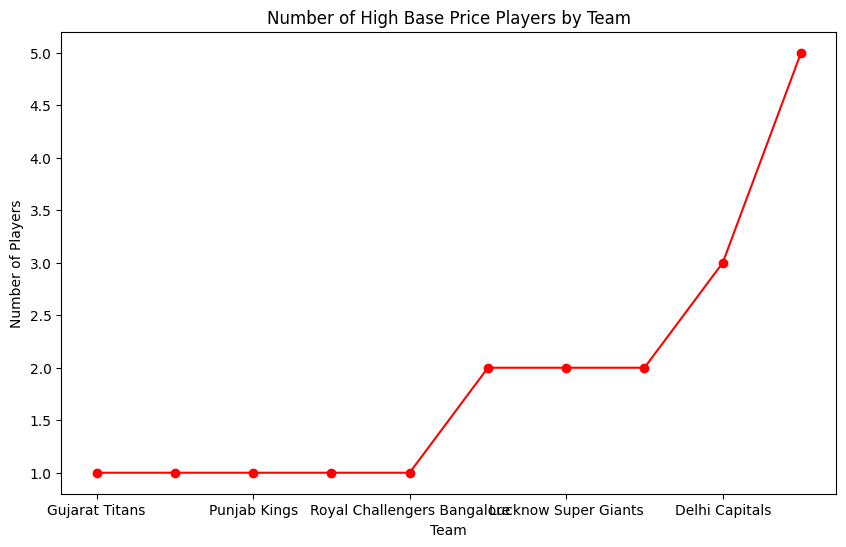

In [18]:
# Define a threshold for higher base price
threshold = df['Base Price'].quantile(0.75)  # Top 25% as an example

high_price_counts = df[df['Base Price'] > threshold]['Team'].value_counts()

plt.figure(figsize=(10, 6))
high_price_counts.sort_values().plot(kind='line', marker='o', color='red')
plt.title('Number of High Base Price Players by Team')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.show()

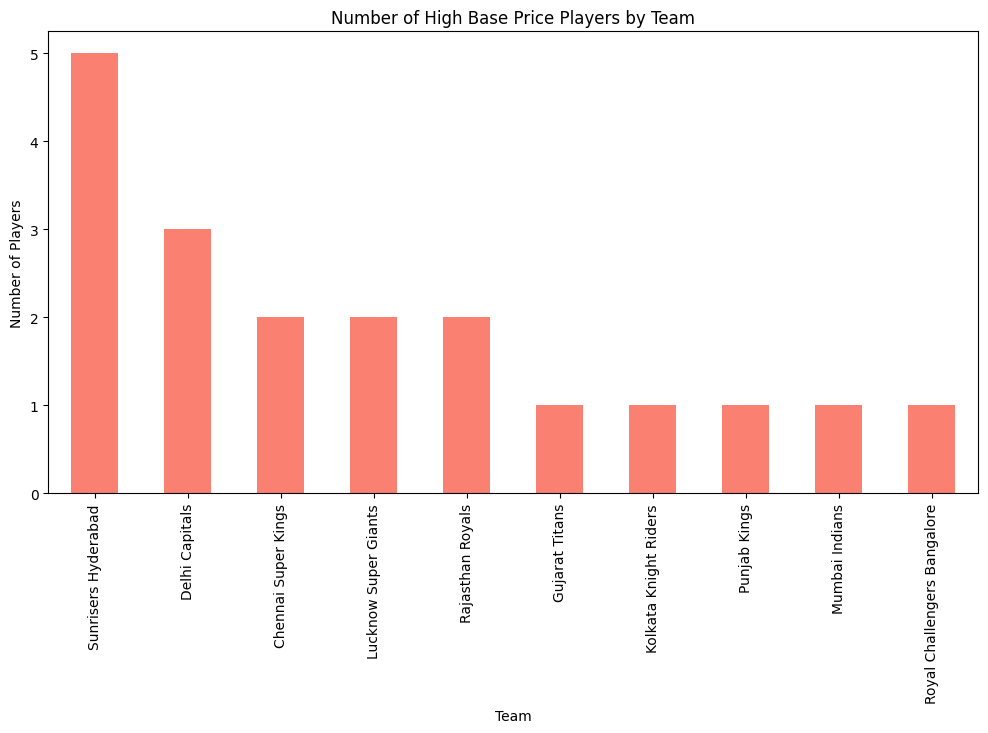

In [19]:
# Define a threshold for higher base price
threshold = df['Base Price'].quantile(0.75)  # Top 25% as an example

plt.figure(figsize=(12, 6))

# Filter the DataFrame to include only players with a base price higher than the threshold
df[df['Base Price'] > threshold]['Team'].value_counts().plot(kind='bar', color='salmon')

plt.title('Number of High Base Price Players by Team')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.show()

### Q4. Which team has most all rounders?

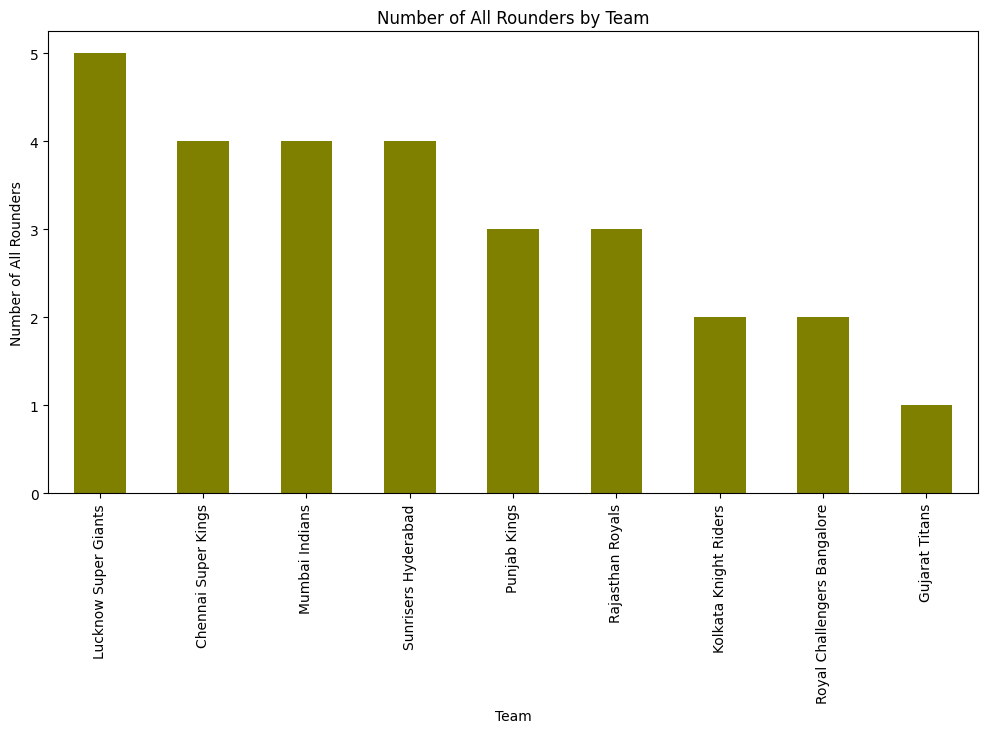

In [20]:
plt.figure(figsize=(12, 6))
df[df['TYPE'] == 'ALL-ROUNDER']['Team'].value_counts().plot(kind='bar', color='olive')
plt.title('Number of All Rounders by Team')
plt.xlabel('Team')
plt.ylabel('Number of All Rounders')
plt.show()

### Q5. What type of players are most considered in a team?

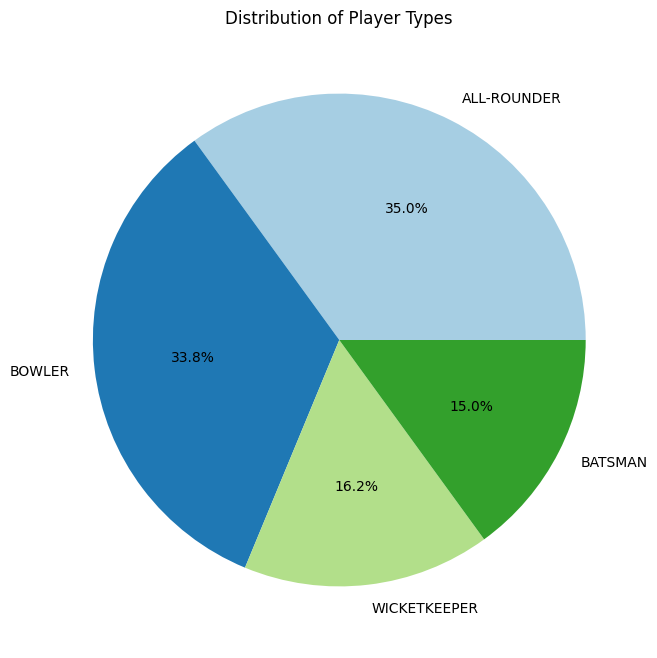

In [21]:
plt.figure(figsize=(8, 8))
df['TYPE'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Paired'))
plt.title('Distribution of Player Types')
plt.ylabel('')
plt.show()

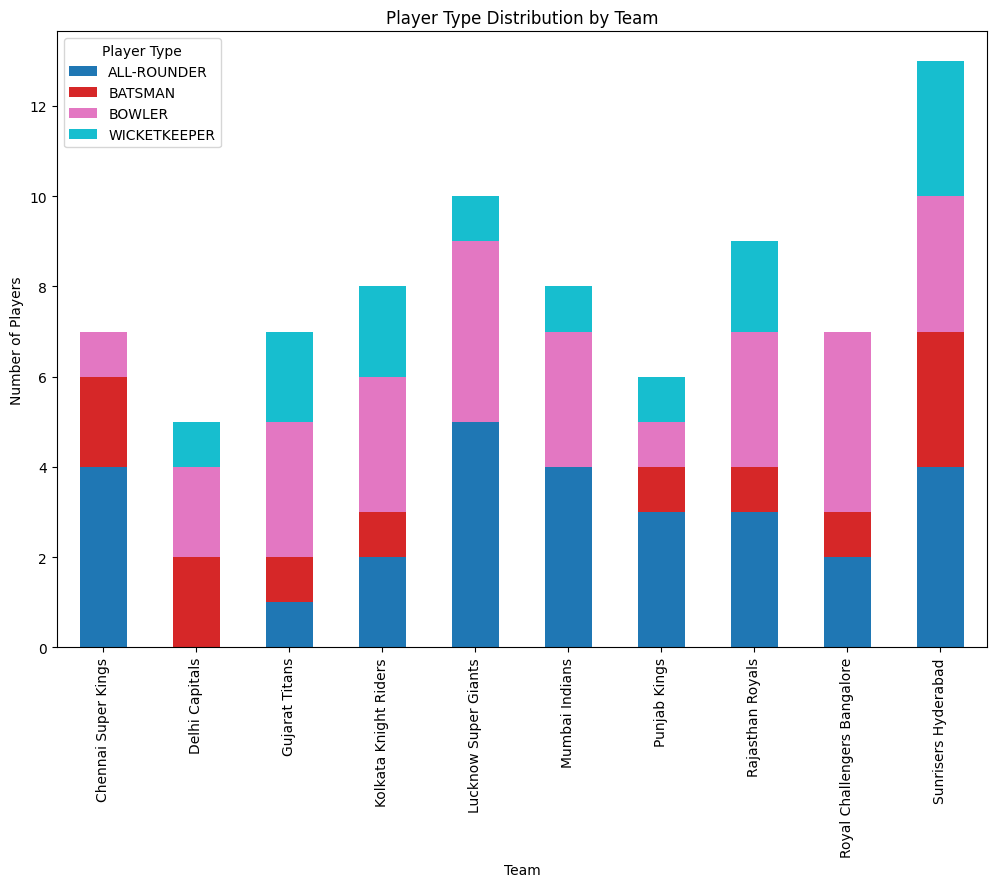

In [22]:
player_type_count = df.groupby(['Team', 'TYPE']).size().unstack().fillna(0)
player_type_count.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab10')
plt.title('Player Type Distribution by Team')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.legend(title='Player Type')
plt.show()

### **Conclusion**  

In this examination, we used the IPL 2023 dataset, including base prices of players and types of players, etc., and extensive data science in the works. We addressed particular analytical questions, made sure the data was clean and well-organized, conducted exploratory data analysis (EDA) to identify important patterns and connections, and clearly visualized the results of our analysis. This method showed the value of organized data analysis in sports analytics by offering helpful data about teams, types of players, and players's base prices, etc.